In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import utils

In [2]:
DATA_DIR = "./flower_photos"
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 180
BATCH_SIZE = 32
VAL_SPLIT = 0.2
SEED = 42
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VAL_SPLIT,
    subset="training",
    seed=SEED,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)  # .cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

val_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VAL_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)  # .cache().prefetch(buffer_size=AUTOTUNE)

class_names = train_ds.class_names

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [4]:
augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [5]:
for x_batch, y_batch in train_ds.take(1):
    break

In [6]:
image = x_batch[:1]
images = [tf.squeeze(image).numpy().astype('uint8')]
for _ in range(15):
    aug = augmentation(image)
    aug = tf.squeeze(aug).numpy().astype('uint8')
    images.append(aug)

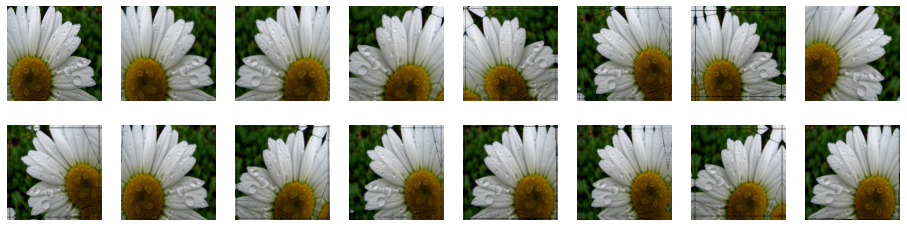

In [7]:
utils.plot_images(images)